# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
when = []
found_cities = []


# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    try:
        
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        when.append(response['dt'])
        found_cities.append(city)
   
        print(response['id'],i,city)
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
        
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

Missing field/result... skipping.
5983607 1 inuvik
6185377 2 yellowknife
3874787 3 punta arenas
5848280 4 kapaa
2075265 5 busselton
Missing field/result... skipping.
2122104 7 petropavlovsk-kamchatskiy
3407980 8 alenquer
3867427 9 mayor pablo lagerenza
Missing field/result... skipping.
1006984 11 east london
3443061 12 chuy
5106841 13 albany
2138555 14 poum
3466165 15 cidreira
847633 16 alta
5983720 17 iqaluit
5044290 18 saint anthony
3652764 19 puerto ayora
347634 20 tahta
72181 21 marzuq
6089245 22 norman wells
Missing field/result... skipping.
3137469 24 sorland
5855927 25 hilo
3441890 26 maldonado
57289 27 hargeysa
4030556 28 rikitea
2971481 29 tulle
2079582 30 alyangula
2022572 31 khatanga
1068670 32 bealanana
4032243 33 vaini
2206939 34 bluff
2618795 35 klaksvik
3430863 36 mar del plata
4031637 37 lavrentiya
2155415 38 new norfolk
6201424 39 mataura
3404558 40 cabedelo
2121385 41 severo-kurilsk
1015776 42 bredasdorp
Missing field/result... skipping.
3831208 44 qaanaaq
3421719 45 

2214432 374 nalut
1791464 375 wenling
149070 376 utete
2023584 377 imeni poliny osipenko
1260129 378 patharia
3653523 379 palora
4034551 380 faanui
3924679 381 vilhena
6067747 382 matagami
2334652 383 keffi
2027042 384 batagay-alyta
519085 385 novoalekseyevskaya
1489853 386 tazovskiy
6096551 387 pangnirtung
595284 388 rietavas
6149996 389 smithers
3402648 390 carutapera
5062458 391 west fargo
6457397 392 bose
142255 393 bafq
1497337 394 kayerkan
5856516 395 ahuimanu
3703938 396 nata
4021858 397 guerrero negro
4031742 398 egvekinot
152451 399 musoma
3946820 400 barranca
737723 401 satuk
2516542 402 huercal-overa
4513583 403 hamilton
2374583 404 bubaque
2634739 405 warrington
2610343 406 vestmanna
3386213 407 touros
2961123 408 tralee
1260706 409 paliyad
2374775 410 bissau
6255012 411 flinders
2669047 412 timra
Missing field/result... skipping.
4036284 414 alofi
3421193 415 paamiut
584087 416 afrikanda
3372760 417 praia da vitoria
Missing field/result... skipping.
1495626 419 pangody
344

In [5]:
weather = {
    "city": found_cities,
    "lat": lat,
    "long": lng,
    "max_temp": max_temp,
    "humidity":hum,
    "cloudiness":cloud,
    "wind_speed":wind,
    "country":country,
    "date":when
}
weather_data = pd.DataFrame(weather)
weather_data.head()

,city,lat,long,max_temp,humidity,cloudiness,wind_speed,country,date
0,inuvik,68.3499,-133.7218,54.36,90,90,8.05,CA,1627382361
1,yellowknife,62.4560,-114.3525,52.32,82,90,3.00,CA,1627382362
2,punta arenas,-53.1500,-70.9167,41.11,87,75,9.22,CL,1627382362
3,kapaa,22.0752,-159.3190,79.12,82,75,1.01,US,1627382362
4,busselton,-33.6500,115.3333,50.09,54,91,15.64,AU,1627382362


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv("output_data/CityData.csv", index=False)

In [7]:
weather_data.describe()

,lat,long,max_temp,humidity,cloudiness,wind_speed,date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.084262,18.019229,70.547795,70.257496,52.867725,8.316420,1.627382e+09
std,33.823012,91.827499,14.683920,22.394409,39.036566,6.096234,6.473658e+01
min,-54.800000,-179.166700,22.750000,6.000000,0.000000,0.000000,1.627382e+09
25%,-6.932750,-65.407400,62.015000,58.000000,7.000000,3.560000,1.627382e+09
50%,22.285500,19.900000,73.270000,76.000000,61.000000,7.290000,1.627382e+09
75%,48.271800,103.068600,80.620000,87.000000,90.000000,11.500000,1.627382e+09
max,78.218600,179.316700,114.850000,100.000000,100.000000,29.060000,1.627382e+09


In [8]:
first  = weather_data.loc[weather_data['city'] =='kapaa']
first
w = datetime.fromtimestamp(first['date'])
print(w)

2021-07-27 06:39:22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
hum_cities = weather_data.loc[weather_data['humidity']>100]
n_hum_cities = len(hum_cities)
print(f'Number of cities wiht > 100% humidity in the list is {n_hum_cities}')


Number of cities wiht > 100% humidity in the list is 0


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

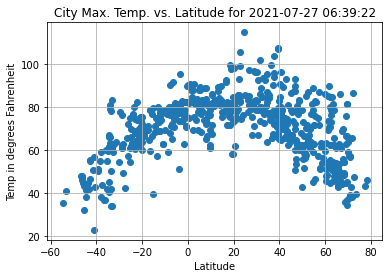

In [12]:
# Scatter plot Temp v latitude
x_vals = weather_data['lat']
y_vals = weather_data['max_temp']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Temp in degrees Fahrenheit')
plt.title(f'City Max. Temp. vs. Latitude for {w}')


plt.savefig('Images/Temp_v_Latitude_Scatter.png')
plt.show()

### Scatter Plot of City Temperatures vs. Latitude shows maximum temperatures between 20 - 40 degrees latittude.

## Latitude vs. Humidity Plot

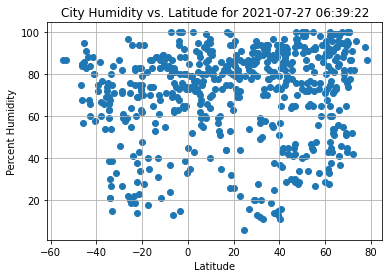

In [13]:
# Scatter plot Temp v Humidity
x_vals = weather_data['lat']
y_vals = weather_data['humidity']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Percent Humidity')
plt.title(f'City Humidity vs. Latitude for {w}')
plt.savefig('Images/Humidity_v_Latitude_Scatter.png')

plt.show()

### Plot of humidity vs Latitude does not show an obvious correlation.

## Latitude vs. Cloudiness Plot

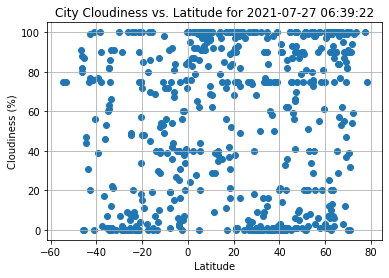

In [14]:
# Scatter plot Temp v Cloudiness
x_vals = weather_data['lat']
y_vals = weather_data['cloudiness']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Cloudiness vs. Latitude for {w}')
plt.savefig('Images/Cloudiness_v_Latitude_Scatter.png')

plt.show()

## Latitude vs. Wind Speed Plot

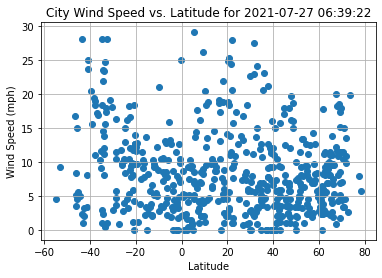

In [15]:
# Scatter plot Temp v Humidity
x_vals = weather_data['lat']
y_vals = weather_data['wind_speed']
plt.scatter(x_vals,y_vals)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Wind Speed vs. Latitude for {w}')
plt.savefig('Images/WindSpeed_v_Latitude_Scatter.png')

plt.show()

### Wind Speed does not correlate to City Latitude on this day.

## Linear Regression

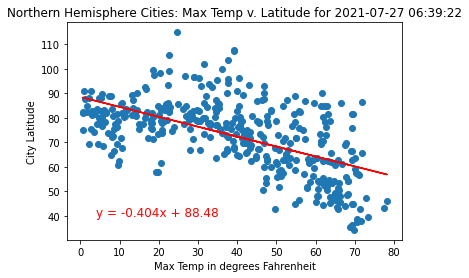

 R-value : -0.5834777872383947; P-value: 5.937673698311194e-37


In [16]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(4,40),fontsize=12,color="red")
plt.xlabel('Max Temp in degrees Fahrenheit')
plt.ylabel('City Latitude')
plt.title(f'Northern Hemisphere Cities: Max Temp v. Latitude for {w}')


plt.savefig('Images/Northern Temp Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

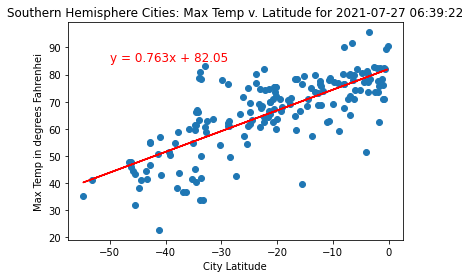

 R-value : 0.7480975147388347; P-value: 5.4483745041933005e-33


In [17]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['max_temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,85),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temp in degrees Fahrenhei')
plt.title(f'Southern Hemisphere Cities: Max Temp v. Latitude for {w}')


plt.savefig('Images/Southern Temp Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

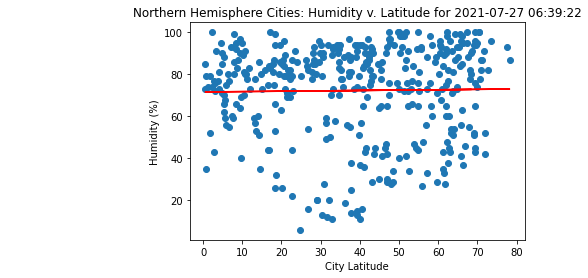

 R-value : 0.01637134282360807; P-value: 0.7472315374928326


In [18]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Cities: Humidity v. Latitude for {w}')


plt.savefig('Images/Northern Humidity Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

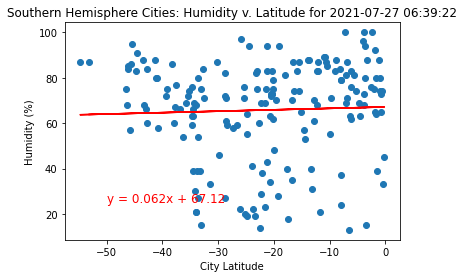

 R-value : 0.039332861564356086; P-value: 0.6032146297335506


In [19]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Cities: Humidity v. Latitude for {w}')


plt.savefig('Images/Southern Humidity Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

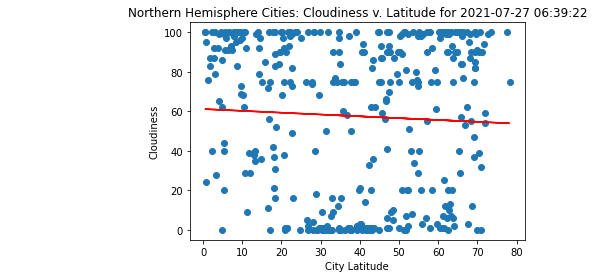

 R-value : -0.04834070151263825; P-value: 0.34102354880925434


In [20]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-50,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere Cities: Cloudiness v. Latitude for {w}')


plt.savefig('Images/Northern Cloudiness Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

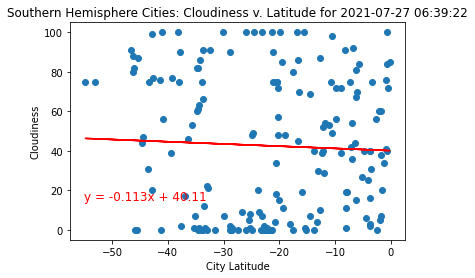

 R-value : -0.044356733084854036; P-value: 0.5577173196239007


In [21]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-55,15),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere Cities: Cloudiness v. Latitude for {w}')


plt.savefig('Images/Southern Cloudiness Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

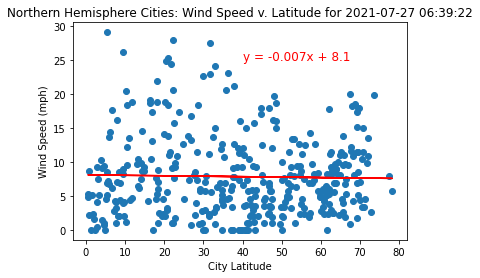

 R-value : -0.02352315524012141; P-value: 0.6432797482677659


In [22]:
north = weather_data.loc[weather_data['lat']>0]
x = north['lat']
y = north['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(40,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Cities: Wind Speed v. Latitude for {w}')


plt.savefig('Images/Northern Wind Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

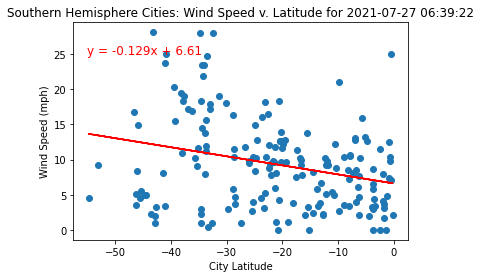

 R-value : -0.2776808313923669; P-value: 0.0001825693293549353


In [23]:
south = weather_data.loc[weather_data['lat']<0]
x = south['lat']
y = south['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_y = x * slope + intercept
reg_line = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression_y,"r-")
plt.annotate(reg_line,(-55,25),fontsize=12,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Cities: Wind Speed v. Latitude for {w}')


plt.savefig('Images/Southern Wind Regression.png')
plt.show()
print(f' R-value : {rvalue}; P-value: {pvalue}')